# Exercise: The Ames Housing Datatset

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("datasets/ames_housing_no_missing.csv")

In [3]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [4]:
target_name = "SalePrice"
target = housing[target_name]

In [5]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

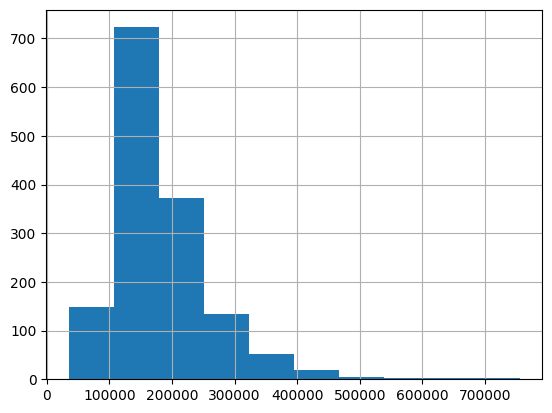

In [9]:
target.hist()

In [8]:
data = housing.drop(columns=[target_name])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

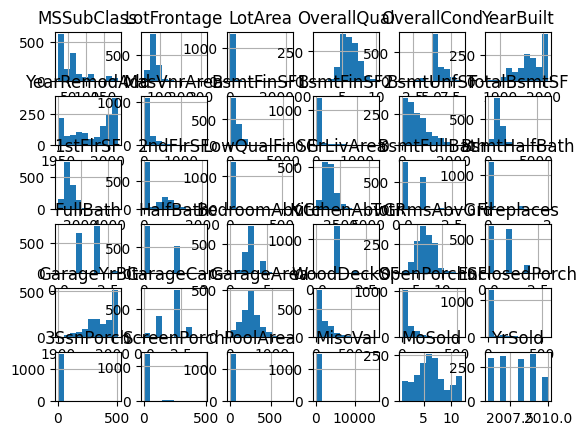

In [12]:
_ = data.select_dtypes("number").hist()

In [14]:
data.select_dtypes("object").describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,1419,925,1311,1459,1052,1382,225,1260,...,951,686,1392,1407,1340,1456,1336,1455,1267,1198


In [18]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [19]:
numerical_column_selector = selector(dtype_exclude=object)
categorical_column_selector = selector(dtype_include=object)

numerical_columns = numerical_column_selector(data)
categorical_columns = categorical_column_selector(data)

In [35]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
numerical_preprocessor = StandardScaler()

In [36]:
preprocessor = make_column_transformer(
    (categorical_preprocessor, categorical_columns),
    (numerical_preprocessor, numerical_columns)
)

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor

model_dummy = make_pipeline(preprocessor, DummyRegressor(strategy="mean"))

In [38]:
from sklearn.model_selection import cross_validate

In [44]:
cv_results_dummy = cross_validate(model_dummy, data, target)

In [40]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [50]:
model_hgb = make_pipeline(preprocessor, HistGradientBoostingRegressor(scoring="r2"))

In [51]:
cv_results_hgb = cross_validate(model_hgb, data, target)

In [52]:
cv_results_hgb["test_score"].mean(), cv_results_hgb["test_score"].std()

(np.float64(0.869903998809501), np.float64(0.022879710152299847))